VOLCANOES
In my portion of the presentation, I will be covering volcanoes, and -- more specifically, the following 
questions:
1.) Which countries have the most volcanoes?
2.) Globally, what is the most common type of volcano?

I'll then plot these two datasets so we can visualize the data.

Let's dive right in.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import datetime as dt
import hvplot.pandas
%matplotlib inline
from PIL import Image
from IPython.display import display

In [2]:
#Bringing in Volcanoes

Volcanoes = Path("../Resources/volcano.csv")
Volcanoes = pd.read_csv(Volcanoes)

In [3]:
Volcanoes.head()

,volcano_number,volcano_name,primary_volcano_type,last_eruption_year,country,region,subregion,latitude,longitude,elevation,...,major_rock_5,minor_rock_1,minor_rock_2,minor_rock_3,minor_rock_4,minor_rock_5,population_within_5_km,population_within_10_km,population_within_30_km,population_within_100_km
0,283001,Abu,Shield(s),-6850,Japan,"Japan, Taiwan, Marianas",Honshu,34.500,131.600,641,...,,,,,,,3597,9594,117805,4071152
1,355096,Acamarachi,Stratovolcano,Unknown,Chile,South America,"Northern Chile, Bolivia and Argentina",-23.292,-67.618,6023,...,,,,,,,0,7,294,9092
2,342080,Acatenango,Stratovolcano(es),1972,Guatemala,México and Central America,Guatemala,14.501,-90.876,3976,...,,Basalt / Picro-Basalt,,,,,4329,60730,1042836,7634778
3,213004,Acigol-Nevsehir,Caldera,-2080,Turkey,Mediterranean and Western Asia,Turkey,38.537,34.621,1683,...,,,,,,,127863,127863,218469,2253483
4,321040,Adams,Stratovolcano,950,United States,Canada and Western USA,USA (Washington),46.206,-121.490,3742,...,,Dacite,,,,,0,70,4019,393303


In [4]:
#Let's take a look at the data types to see what we have to work with. 
Volcanoes.dtypes

volcano_number                int64
volcano_name                 object
primary_volcano_type         object
last_eruption_year           object
country                      object
region                       object
subregion                    object
latitude                    float64
longitude                   float64
elevation                     int64
tectonic_settings            object
evidence_category            object
major_rock_1                 object
major_rock_2                 object
major_rock_3                 object
major_rock_4                 object
major_rock_5                 object
minor_rock_1                 object
minor_rock_2                 object
minor_rock_3                 object
minor_rock_4                 object
minor_rock_5                 object
population_within_5_km        int64
population_within_10_km       int64
population_within_30_km       int64
population_within_100_km      int64
dtype: object

So, which countries have the most volcanoes? 

In [5]:
#HOW MANY VOLCANOES PER COUNTRY
Volcanoes['country'].value_counts()

country
United States              99
Indonesia                  95
Japan                      92
Russia                     79
Chile                      43
                           ..
North Korea-South Korea     1
Guatemala-El Salvador       1
Colombia-Ecuador            1
Djibouti                    1
Germany                     1
Name: count, Length: 89, dtype: int64

In [6]:
# Grab the `volcano_name` and `country` columns
volcano_to_country = Volcanoes.loc[:, ['volcano_name', 'country']]
volcano_to_country

,volcano_name,country
0,Abu,Japan
1,Acamarachi,Chile
2,Acatenango,Guatemala
3,Acigol-Nevsehir,Turkey
4,Adams,United States
...,...,...
953,Zimina,Russia
954,Zitacuaro-Valle de Bravo,Mexico
955,Zubair Group,Yemen
956,Zukur,Yemen


In [7]:
grouped_volcanoes = volcano_to_country.groupby('country').size()
grouped_volcanoes_df = pd.DataFrame(grouped_volcanoes)
grouped_volcanoes_df = grouped_volcanoes_df.rename(columns={0: 'count'})
grouped_volcanoes_df.reset_index(inplace=True)
grouped_volcanoes_df.columns
grouped_volcanoes_df

,country,count
0,Algeria,1
1,Antarctica,17
2,Argentina,14
3,Armenia,3
4,Armenia-Azerbaijan,1
...,...,...
84,United Kingdom,11
85,United States,99
86,Vanuatu,11
87,Vietnam,3


In [8]:
# Filter down to 20 countries with the most volcanoes
most_volcanoes = grouped_volcanoes_df.nlargest(20, 'count')
most_volcanoes

,country,count
85,United States,99
44,Indonesia,95
47,Japan,92
65,Russia,79
12,Chile,43
43,Iceland,28
51,Mexico,28
61,Papua New Guinea,28
63,Philippines,27
26,Ecuador,26


In [9]:
# Using the Most Volcanoes DataFrame to plot a hvplot bar chart
most_volcanoes.hvplot.bar(rot=45, x= 'country', title='Countries with the Most Volcanoes')

:Bars   [country]   (count)

Did you know how many types of volcanoes there are? Let's break it down...

In [10]:
#Cleaning up data to create a DF for volcano counts
volcano_types = Volcanoes['primary_volcano_type'].value_counts()
volcano_types_df = pd.DataFrame(volcano_types)
volcano_types_df = volcano_types_df.reset_index()
volcano_types_df

,primary_volcano_type,count
0,Stratovolcano,353
1,Stratovolcano(es),107
2,Shield,85
3,Volcanic field,71
4,Pyroclastic cone(s),70
5,Caldera,65
6,Complex,46
7,Shield(s),33
8,Submarine,27
9,Lava dome(s),26


In [11]:
#Let's clean up the data some more by removing the duplicates...
volcano_types_df['primary_volcano_type'] = volcano_types_df['primary_volcano_type'].str.replace('(es)', '')
volcano_types_df['primary_volcano_type'] = volcano_types_df['primary_volcano_type'].str.replace('(s)', '')
volcano_types_df['primary_volcano_type'] = volcano_types_df['primary_volcano_type'].str.replace('?', '')
volcano_types_df = volcano_types_df.groupby('primary_volcano_type').sum()
volcano_types_df

,count
primary_volcano_type,
Caldera,74
Complex,47
Compound,9
Crater rows,5
Fissure vent,12
Lava cone,3
Lava dome,29
Maar,8
Pyroclastic cone,74


Now let's use a pie chart to bring in a visual for all this data. 

In [12]:
import matplotlib.pyplot as plt

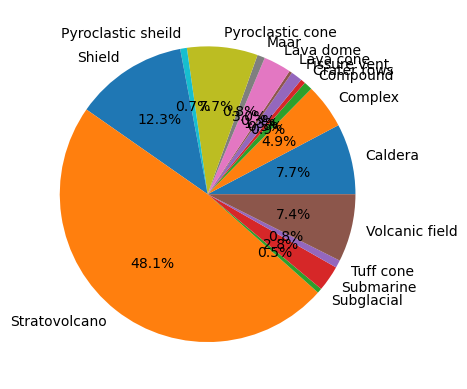

In [13]:
labels = ['Caldera', 'Complex', 'Compound', 'Crater rows', 'Fissure vent', 'Lava cone', 'Lava dome', 'Maar', 'Pyroclastic cone', 'Pyroclastic sheild', 'Shield', 'Stratovolcano', 'Subglacial', 'Submarine', 'Tuff cone', 'Volcanic field']
sizes = [74, 47, 9, 5, 12, 3, 29, 8, 74, 7, 118, 461, 5, 27, 8, 71]

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show()

By analyzing the pie chart above, we can clearly see that Stratovolcanoes are the most prevalent type.
As an example, here is a picture of my husband and I posing in front of Arenal Volcano, one of Costa Rica's 
most famous Stratovolcanoes! 

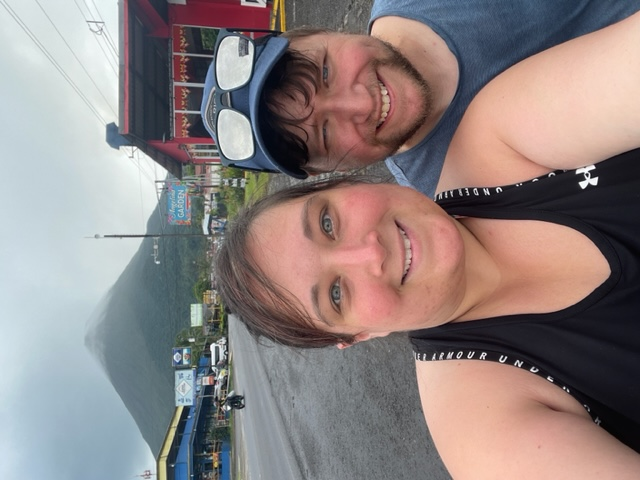